In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
gpus  = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import cv2
import imghdr

/tmp/ipython-input-4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = '/content/drive/MyDrive/data'

In [5]:
image_exts = ['jpg','png','jpeg','bmp']

In [6]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/data','happy','image15.jpeg'))
img.shape

(183, 275, 3)

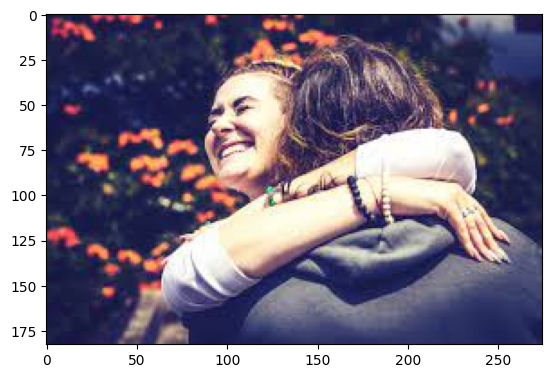

In [7]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [8]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
        print('Issue with image {}'.format(image_path))
        os.remove(image_path)

In [9]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 305 files belonging to 2 classes.


In [10]:
len(data)

10

In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

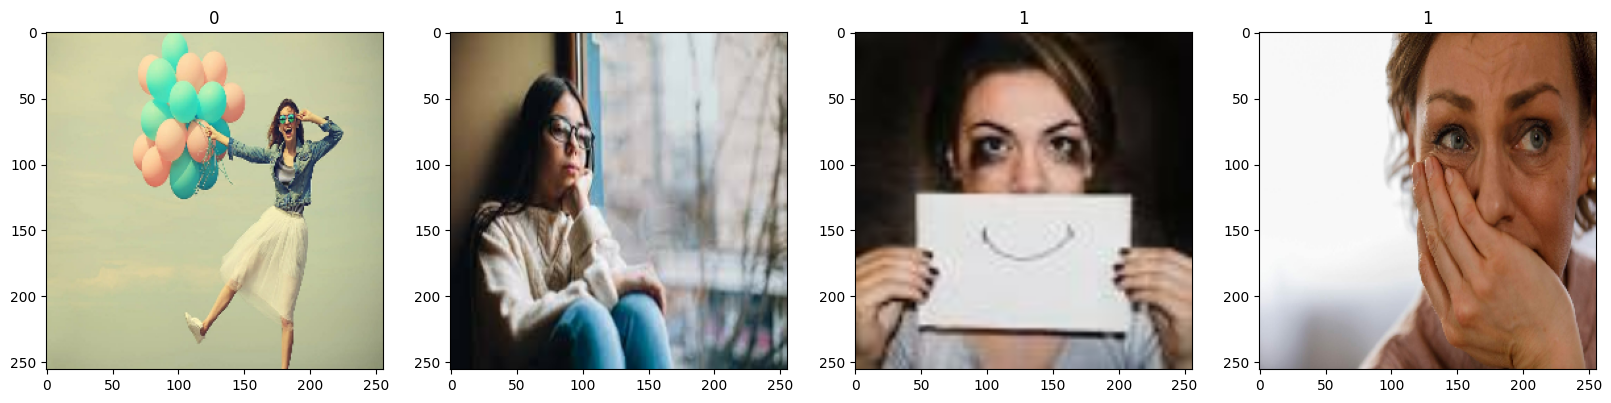

In [13]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))  # iterate over the images which is batch[0] , in particular the first 4 by slicing to 4 then plotting the labels which is batch[1]
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

## Class 1 is sad while Class 0 is happy

In [14]:
batch # batch is of size 2 , first element is image tensor , second element is labels

(array([[[[197.       , 196.       , 151.23047  ],
          [197.       , 196.       , 150.3086   ],
          [198.       , 197.       , 149.       ],
          ...,
          [165.       , 169.       , 136.       ],
          [162.8457   , 166.8457   , 133.8457   ],
          [163.       , 167.       , 134.       ]],
 
         [[197.       , 196.       , 151.91884  ],
          [197.       , 196.       , 150.3086   ],
          [198.       , 197.       , 149.       ],
          ...,
          [165.       , 169.       , 136.       ],
          [162.8457   , 166.8457   , 133.8457   ],
          [163.       , 167.       , 134.       ]],
 
         [[197.       , 196.       , 151.86473  ],
          [197.       , 196.       , 151.70268  ],
          [198.       , 197.       , 150.52287  ],
          ...,
          [165.       , 169.       , 136.       ],
          [162.8457   , 166.8457   , 133.8457   ],
          [163.       , 167.       , 134.       ]],
 
         ...,
 
         [[1

##Preprocessing Images

In [15]:
data = data.map(lambda x,y: (x/255,y))

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [17]:
batch = scaled_iterator.next()

In [18]:
batch[0].min(),batch[0].max()

(np.float32(0.0), np.float32(1.0))

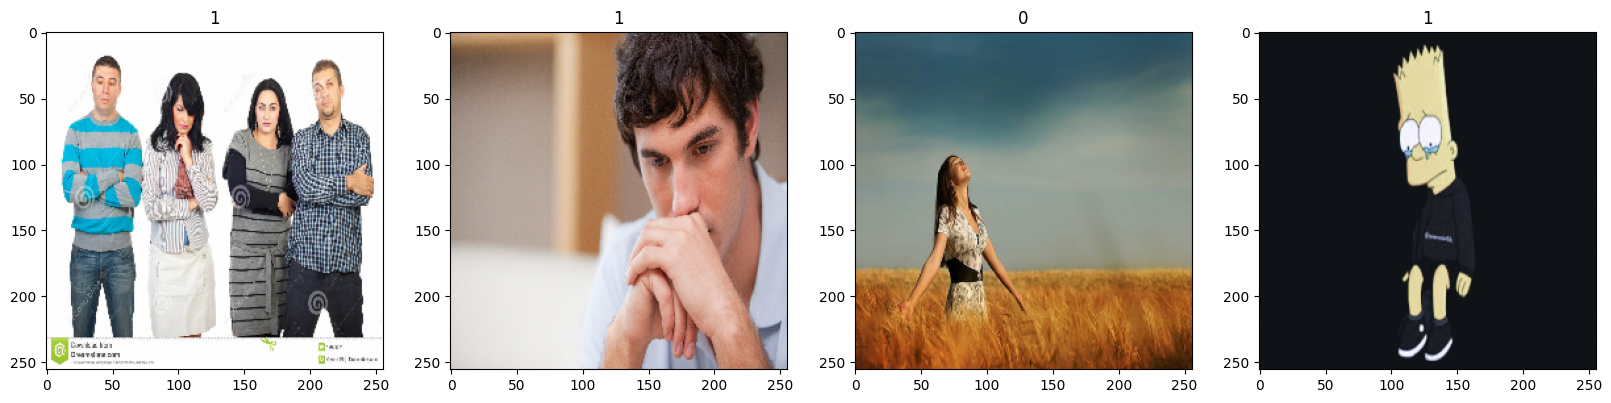

In [19]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))  # iterate over the images which is batch[0] , in particular the first 4 by slicing to 4 then plotting the labels which is batch[1]
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [20]:
len(data)

10

In [21]:
train_size = int(0.7*(len(data)))
valid_size = int(0.2*(len(data)))
test_size = int(0.1*(len(data))) +1

In [22]:
test_size

2

In [23]:
train = data.take(train_size)
valid = data.skip(train_size).take(valid_size)
test = data.skip(train_size+valid_size).take(test_size)

#Deep Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Filter or kernel of size 3x3 reduces our input size by 2 dimensions -> 256 width and 256 length became 254 and 254.
##Then the maxpooling layer by default is a 2x2 , so it halves each dimension further so 256 and 256 become 127 and 127
##Then we flatten them - 30x30x16 = 1440

In [29]:
logdir = '/content/drive/MyDrive/logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train,epochs=20,validation_data=valid,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 592ms/step - accuracy: 0.5435 - loss: 0.7555 - val_accuracy: 0.6094 - val_loss: 0.5949
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 736ms/step - accuracy: 0.6208 - loss: 0.6169 - val_accuracy: 0.6875 - val_loss: 0.5632
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6914 - loss: 0.6440 - val_accuracy: 0.8125 - val_loss: 0.4217
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 654ms/step - accuracy: 0.7746 - loss: 0.5008 - val_accuracy: 0.8750 - val_loss: 0.4773
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 928ms/step - accuracy: 0.8949 - loss: 0.3586 - val_accuracy: 0.9375 - val_loss: 0.3250
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 794ms/step - accuracy: 0.9144 - loss: 0.2980 - val_accuracy: 0.9531 - val_loss: 0.2244
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9258 - loss: 0.2405 - val_accuracy: 0.9531 - val_loss: 0.2013
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 669ms/step - accuracy: 0.9358 - loss: 0.1638 - val_accuracy: 0.9219 - val_loss: 0.18

In [32]:
hist.history

{'accuracy': [0.5491071343421936,
  0.6473214030265808,
  0.7544642686843872,
  0.8169642686843872,
  0.8883928656578064,
  0.8973214030265808,
  0.9241071343421936,
  0.9107142686843872,
  0.9464285969734192,
  0.9732142686843872,
  0.9776785969734192,
  0.9955357313156128,
  0.9866071343421936,
  0.9866071343421936,
  0.9910714030265808,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  1.0,
  0.9955357313156128],
 'loss': [0.7266401648521423,
  0.6048927903175354,
  0.5657715201377869,
  0.45019012689590454,
  0.3619077205657959,
  0.3040284514427185,
  0.2584141790866852,
  0.20460323989391327,
  0.17815935611724854,
  0.10942011326551437,
  0.09179652482271194,
  0.046332620084285736,
  0.04463425651192665,
  0.03346066176891327,
  0.031184883788228035,
  0.015518926084041595,
  0.030736582353711128,
  0.014423558488488197,
  0.008170763030648232,
  0.018219634890556335],
 'val_accuracy': [0.609375,
  0.6875,
  0.8125,
  0.875,
  0.9375,
  0.953125,
  0.953125,
 

Text(0.5, 0.98, 'Loss and Accuracy')

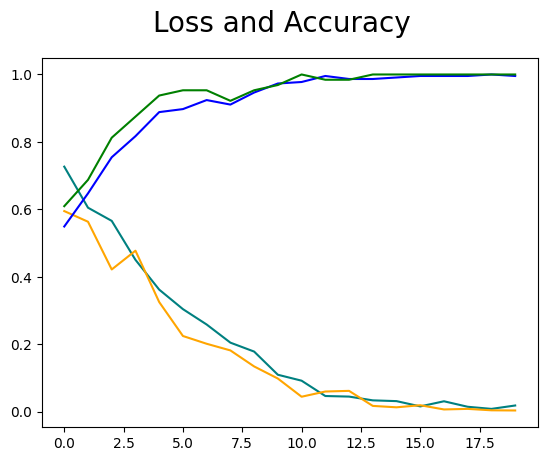

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='green',label='val_accuracy')
fig.suptitle('Loss and Accuracy',fontsize=20)

##Evaluating the model

In [34]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


In [37]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


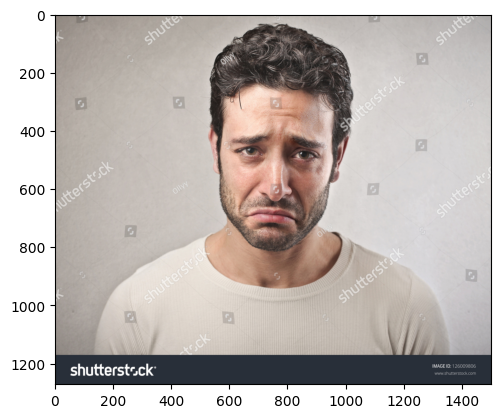

In [44]:
img = cv2.imread('/content/drive/MyDrive/stock-photo-portrait-of-a-man-126009806.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

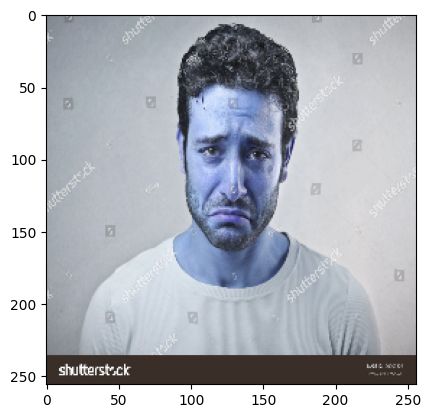

In [45]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [47]:
yhat

array([[0.9997]], dtype=float32)

In [49]:
if yhat > 0.5:
  print(f'Predicted class is Sad and the probability is {yhat}')
else:
  print(f'Predicted class is Happy and the probability is {1-yhat}')

Predicted class is Sad and the probability is [[0.9997]]


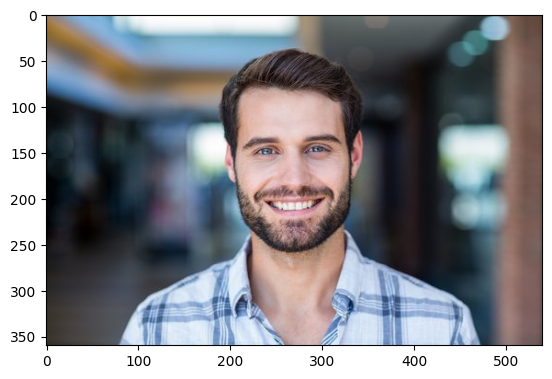

In [50]:
img = cv2.imread('/content/drive/MyDrive/360_F_88538986_5Bi4eJ667pocsO3BIlbN4fHKz8yUFSuA.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

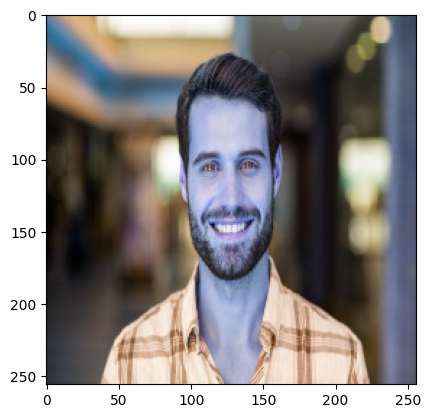

In [51]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [52]:
yhat2 = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [54]:
yhat2

array([[0.99512154]], dtype=float32)

In [53]:
if yhat2 > 0.5:
  print(f'Predicted class is Sad and the probability is {yhat2}')
else:
  print(f'Predicted class is Happy and the probability is {1-yhat2}')

Predicted class is Sad and the probability is [[0.99512154]]


In [55]:
from tensorflow.keras.models import load_model

In [56]:
model.save(os.path.join('models','imageclassifier.h5'))

In [58]:
new_model = load_model('/content/models/imageclassifier.h5')

In [59]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


array([[0.99512154]], dtype=float32)